In [1]:
using Distributions, Compat, Plots, Random, CSV, DataFrames, GLM, Printf
upscale = 1
default(line = (:steppre, 0.5, 1, 2), size=(800*upscale,600*upscale))
if isdefined(Main, :IJulia) && Main.IJulia.inited
    default(dpi = 100)
else
    default(dpi = 350)
end

In [2]:
include("../KalmanFilter.jl")
import .KalmanFilter

### Daten für die folgende Experimente

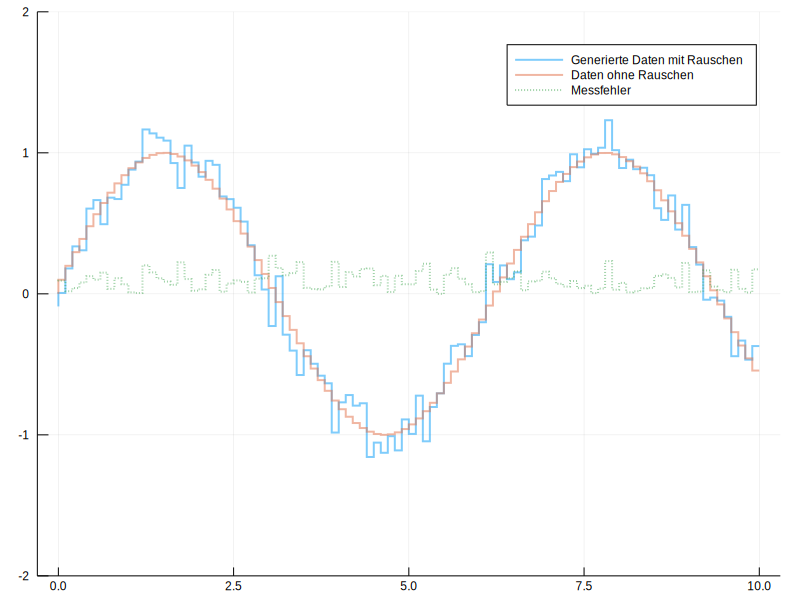

In [3]:
data_scale = 0.1
x = collect(0:data_scale:10)
y = sin.(x)
n = Normal(0, 0.1)
y_measurement = map(x -> x - rand(n), y)
plot(x, y_measurement, ylim = (-2, 2), label = "Generierte Daten mit Rauschen")
plot!(x, y, label = "Daten ohne Rauschen")
plot!(x, abs.(y - y_measurement), label = "Messfehler", linestyle = :dot, line = :steppre)

In [4]:
function calculate_error(y_1, y_2)
    sum(abs.(y_1 - y_2))
end

calculate_error(y, y_measurement)

9.459072195377262

---
### Experiment: Filterung reiner Sinus Werte
Wir versuchen, nur das original Signal zu verfolgen, also diese ohne Rauschen.

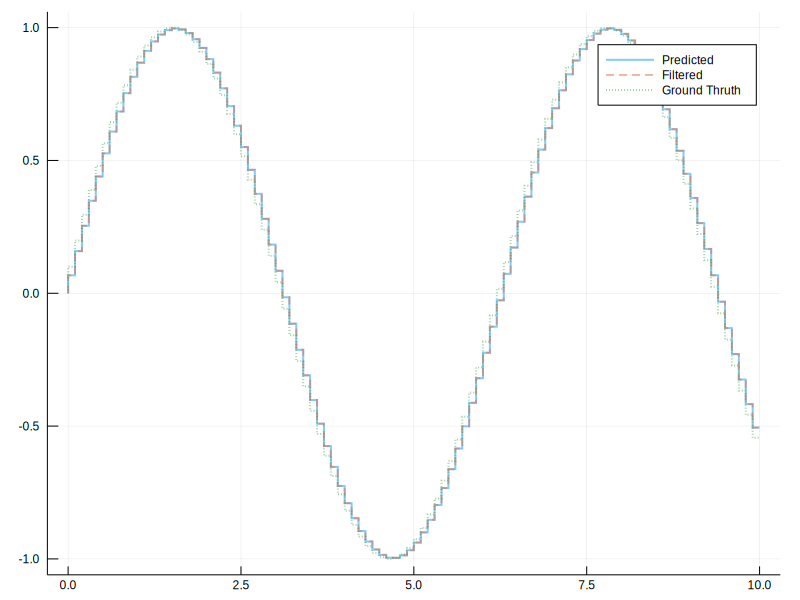

In [5]:
A = 1 # Zustandsübergangsmatrix
G = 1 # Messabbildung Matrix
Q = .8
R = 0.5

x̂_0 = 0
# x̂_0 = f(1)
Σ_0 = 0.5

model = KalmanFilter.Kalman(A, Q, G, R, x̂_0, Σ_0)

y_filtered = zeros(length(x))
y_predicted = zeros(length(x))
for (index, value) in enumerate(x)
    y_cur = y[index]
    y_filtered[index] = KalmanFilter.fusion(model, y_cur).state
    y_predicted[index] = KalmanFilter.predict(model).state
    #@printf "Step %4d    y_m %.3f    filtered %.3f    predicted %.3f    gain %.3f\n" index y_cur y_filtered[index] y_predicted[index] KalmanFilter.K(model)
end

plot(x, y_predicted, label = "Predicted")
plot!(x, y_filtered, label = "Filtered", linestyle=:dash)
plot!(x, y, label = "Ground Thruth", linestyle=:dot)

#### Ergebnisse

In [6]:
@show calculate_error(y, y_filtered)
@show calculate_error(y, y_measurement)

calculate_error(y, y_filtered) = 2.8266888049688057
calculate_error(y, y_measurement) = 9.459072195377262


9.459072195377262

---
### Experiment: Filterung sinus mit Rauschen

Wir versuchen das Originale Signal herzustellen und lassen den Kalman Filter über das Datensatz mit rauschen laufen.

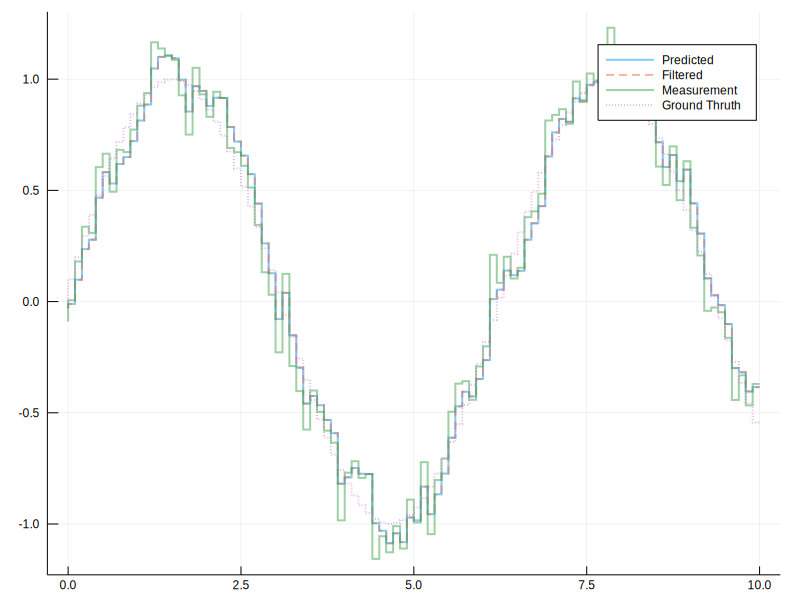

In [7]:
A = 1 # Zustandsübergangsmatrix
G = 1 # Messabbildung Matrix
Q = .8
R = 1

x̂_0 = 0
# x̂_0 = f(1)
Σ_0 = 0.5

model = KalmanFilter.Kalman(A, Q, G, R, x̂_0, Σ_0)

y_filtered = zeros(length(x))
y_predicted = zeros(length(x))
for (index, value) in enumerate(x)
    y_cur = y_measurement[index]
    y_filtered[index] = KalmanFilter.fusion(model, y_cur).state
    y_predicted[index] = KalmanFilter.predict(model).state
    #@printf "Step %4d    y_m %.3f    filtered %.3f    predicted %.3f    gain %.3f\n" index y_cur y_filtered[index] y_predicted[index] KalmanFilter.K(model)
end

plot(x, y_predicted, label = "Predicted")
plot!(x, y_filtered, label = "Filtered", linestyle=:dash)
plot!(x, y_measurement, label = "Measurement")
plot!(x, y, label = "Ground Thruth", linestyle=:dot)

#### Ergebnisse

In [8]:
@show calculate_error(y, y_measurement)
@show calculate_error(y, y_filtered)

calculate_error(y, y_measurement) = 9.459072195377262
calculate_error(y, y_filtered) = 7.200981959452134


7.200981959452134

#### Ergebnis

---
### Experiment: Sinus Werte ohne Rauschen mit Steuerungssignal
Wir lassen den Kalman Filter über reiner Sinus laufen, verwenden aber ein Steuerungssignal.

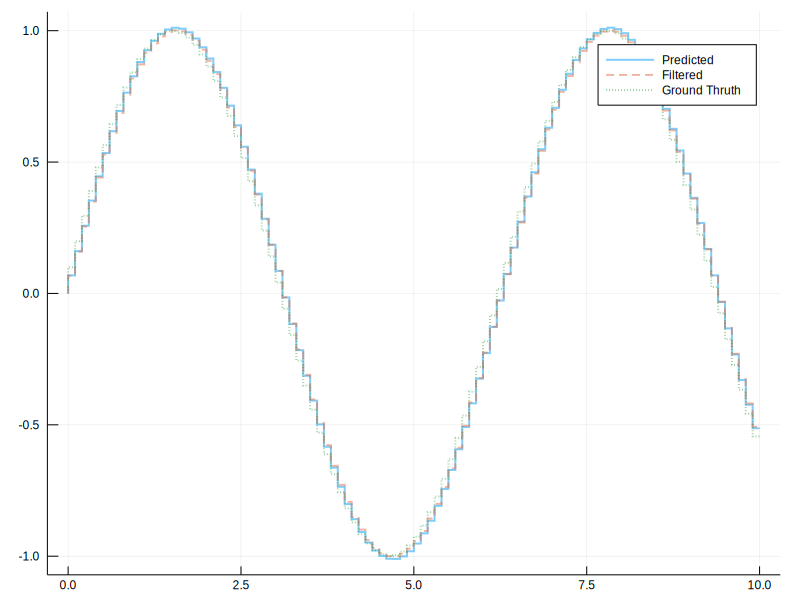

In [9]:
A = 1 # Zustandsübergangsmatrix
G = 1 # Messabbildung Matrix
Q = .8
R = 0.5
B = 0.01
x̂_0 = 0
# x̂_0 = f(1)
Σ_0 = 0.5

model = KalmanFilter.Kalman(A, Q, G, R, x̂_0, Σ_0, B, 1)

y_filtered = zeros(length(x))
y_predicted = zeros(length(x))
for (index, value) in enumerate(x)
    y_cur = y[index]
    y_filtered[index] = KalmanFilter.fusion(model, y_cur).state
    y_predicted[index] = KalmanFilter.predict(model, sin(value)).state
    #@printf "Step %4d    y_m %.3f    filtered %.3f    predicted %.3f    gain %.3f\n" index y_cur y_filtered[index] y_predicted[index] KalmanFilter.K(model)
end

plot(x, y_predicted, label = "Predicted")
plot!(x, y_filtered, label = "Filtered", linestyle=:dash)
plot!(x, y, label = "Ground Thruth", linestyle=:dot)

#### Ergebnis


In [10]:
@show calculate_error(y, y_measurement)
@show calculate_error(y, y_filtered)

calculate_error(y, y_measurement) = 9.459072195377262
calculate_error(y, y_filtered) = 2.847600956229469


2.847600956229469

---
### Experiment: Sinus Werte mit Rauschen und Steuerungssignal

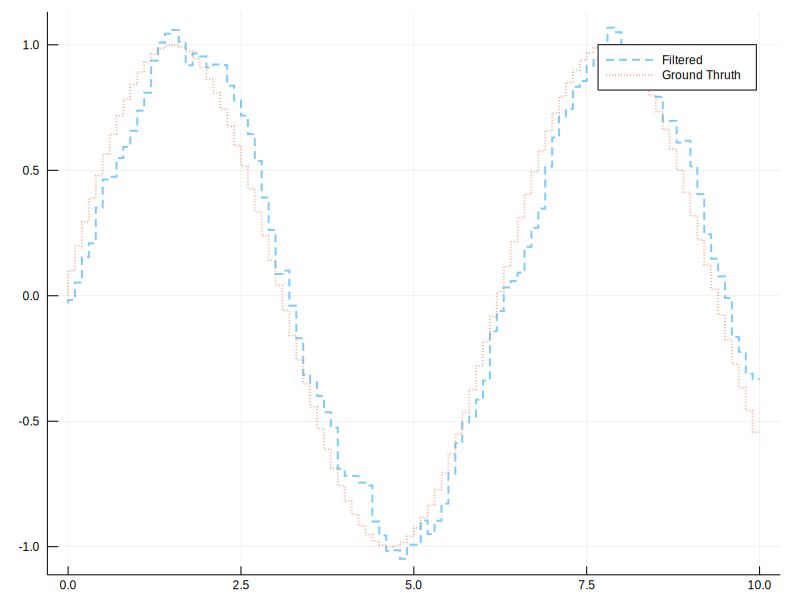

In [11]:
A = 1 # Zustandsübergangsmatrix
G = 1 # Messabbildung Matrix
Q = .2
R = 1
B = sin
x̂_0 = 0
# x̂_0 = f(1)
Σ_0 = 0.5

model = KalmanFilter.Kalman(A, Q, G, R, x̂_0, Σ_0)

y_filtered = zeros(length(x))
y_predicted = zeros(length(x))
for (index, value) in enumerate(x)
    y_cur = y_measurement[index]
    y_filtered[index] = KalmanFilter.fusion(model, y_cur).state
    y_predicted[index] = KalmanFilter.predict(model).state
    #@printf "Step %4d    y_m %.3f    filtered %.3f    predicted %.3f    gain %.3f\n" index y_cur y_filtered[index] y_predicted[index] KalmanFilter.K(model)
end

plot(x, y_predicted, label = "Predicted")
plot(x, y_filtered, label = "Filtered", linestyle=:dash)
#plot!(x, y_measurement, label = "Measurement")
plot!(x, y, label = "Ground Thruth", linestyle=:dot)

In [12]:
@show calculate_error(y, y_measurement)
@show calculate_error(y, y_filtered)

calculate_error(y, y_measurement) = 9.459072195377262
calculate_error(y, y_filtered) = 11.038435199813174


11.038435199813174